### Loading data binaries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from VUDA.io.loadbinary import LoadBinary

In [3]:
filepath = "/home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat"

#### Plot load binary function docstring

In [4]:
perpl_LoadBinary?

Object `perpl_LoadBinary` not found.


#### Load data

In [5]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=3000,
    channels=None,
    downsample=1,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
    verbose=False,
)

In [6]:
print(data)
print(data.shape)

<xarray.DataArray (times: 3000, channels: 64)>
array([[-51.675,  -1.17 ,  48.165, ...,  27.105,  25.74 ,  22.425],
       [-40.95 ,   5.265,  63.18 , ...,  53.82 ,  44.46 ,  25.155],
       [-28.86 ,  17.55 ,  82.095, ...,  47.97 ,  57.525,  27.495],
       ...,
       [-26.13 ,  -5.07 ,   4.485, ...,  73.515,  74.49 ,  72.54 ],
       [-32.175,  -7.605,   8.385, ...,  65.325,  71.175,  52.26 ],
       [-30.03 ,  -7.41 ,  10.53 , ...,  59.28 ,  56.745,  40.755]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times
(3000, 64)


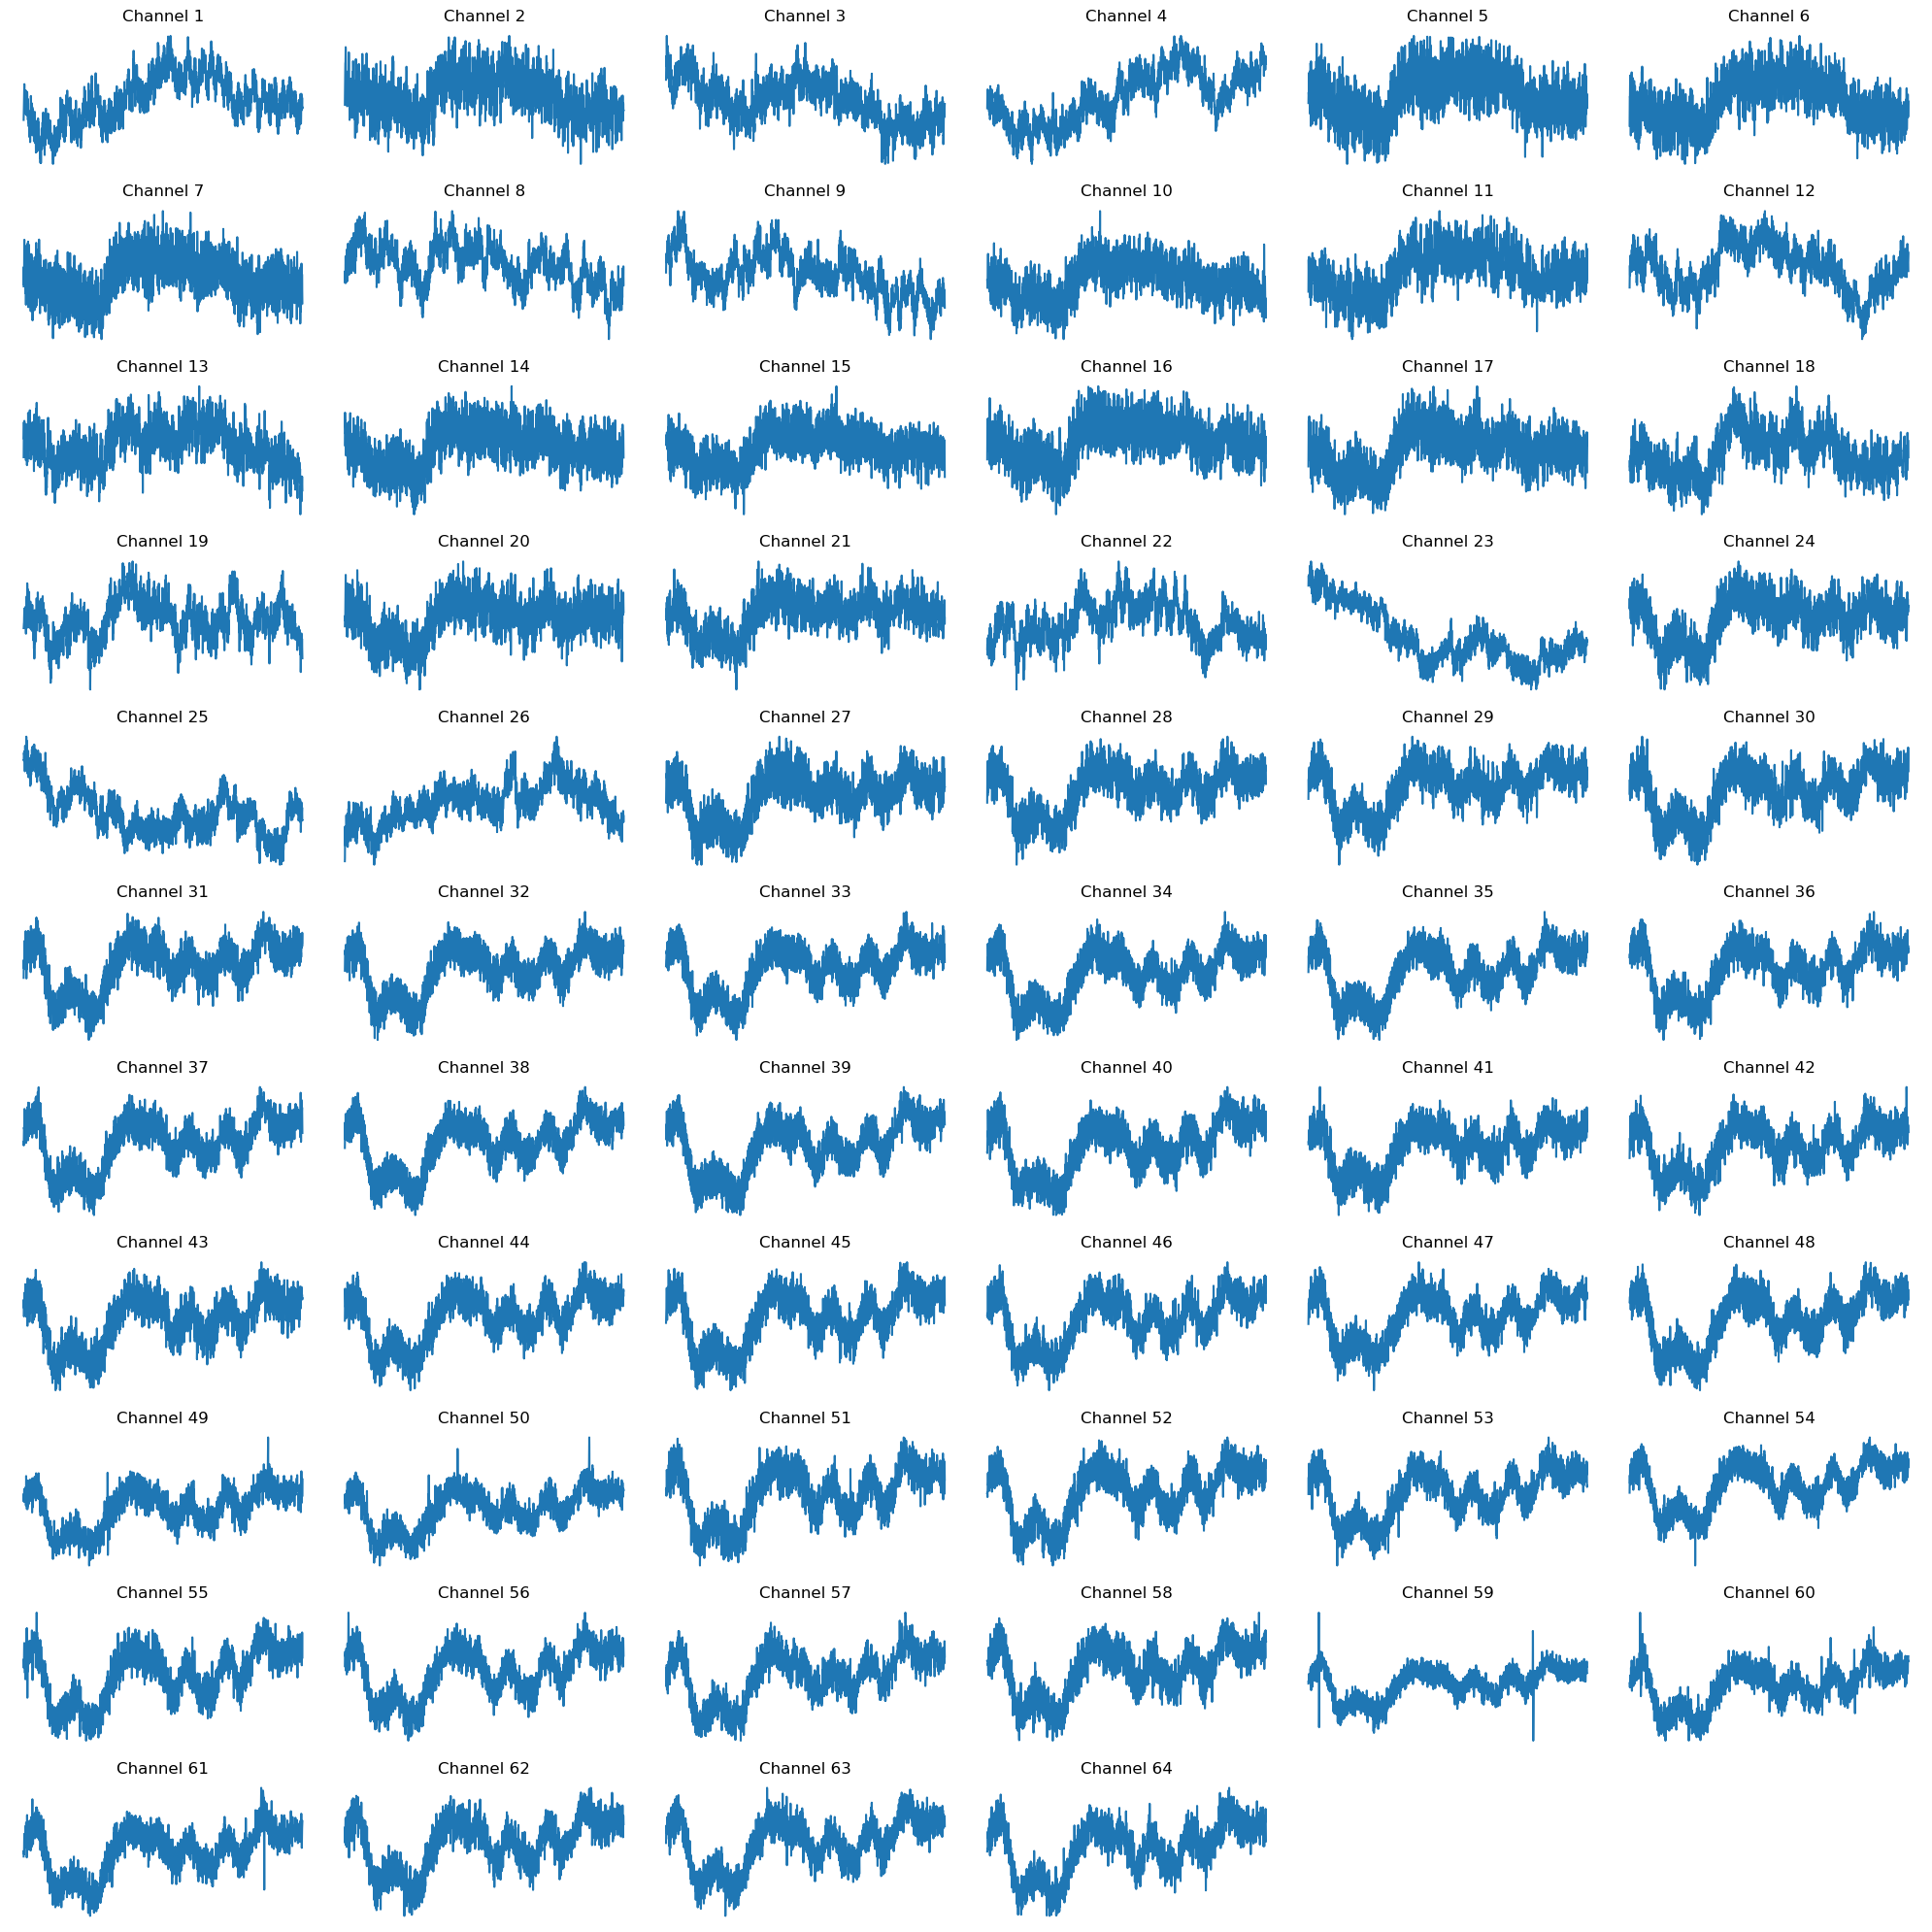

In [7]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [8]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

#### Different durations (in seconds)

### Using Data Loader to load and preprocess raw data

In [9]:
from VUDA.io.dataloader import DataLoader

In [10]:
DataLoader?

Init signature: DataLoader(filename: str, rec_info: str)
Docstring:      Class to load data and preprocess it.
File:           ~/anaconda3/envs/ipp/lib/python3.9/site-packages/VUDA/io/dataloader.py
Type:           type
Subclasses:     

In [11]:
rec_info = os.path.expanduser(
    "/home/vinicius/storage1/projects/vanderbilt/recording_params.json"
)

In [12]:
loader = DataLoader(filepath, rec_info)

In [13]:
loader.loadbinary(nSamplesPerChannel=100000, downsample=30, verbose=True)

INFO:root:Loading binaries from /home/vinicius/funcog/vanderbilt/vanderbilt/neural_data/pHPC_cnct.dat with:
fsample = 30000, start = 0, duration = None, offset = 0, nSamplesPerChannel = 100000, nChannels = 64, precision = <class 'numpy.int16'>, downsample = 30, bitVolts = 0.195.
Loading batches: 20/21: 100%|████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 493.84it/s]


In [14]:
loader

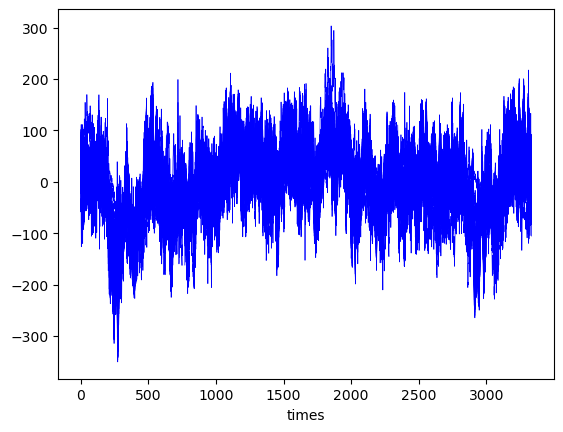

In [15]:
loader.data.plot(hue="channels", color="b", lw=0.5)
plt.legend([], frameon=False)

In [16]:
loader.filter(0, 120, {})

True
Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 111 samples (0.111 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


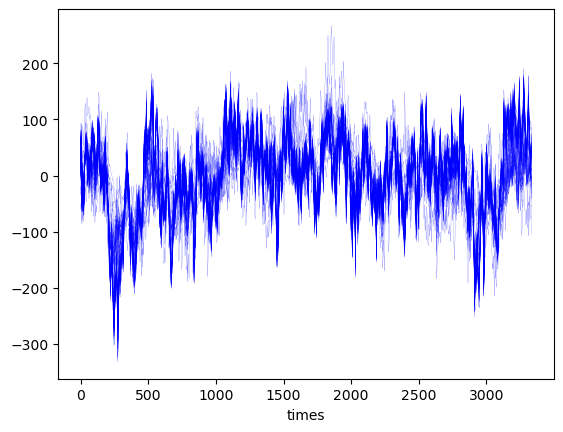

In [17]:
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)

In [18]:
loader.__str__?

Signature:      loader.__str__()
Call signature: loader.__str__(*args, **kwargs)
Type:           method-wrapper
String form:    <method-wrapper '__str__' of DataLoader object at 0x7f96812b64f0>
Docstring:      Return str(self).

In [19]:
import dataclasses

In [20]:
dataclasses.is_dataclass(loader)

False